Epoch 1/10
469/469 [==============================] - 48s 100ms/step - loss: 0.2445 - accuracy: 0.9278 - val_loss: 0.0850 - val_accuracy: 0.9742
Epoch 2/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0635 - accuracy: 0.9803 - val_loss: 0.0419 - val_accuracy: 0.9849
Epoch 3/10
469/469 [==============================] - 47s 101ms/step - loss: 0.0451 - accuracy: 0.9861 - val_loss: 0.0358 - val_accuracy: 0.9875
Epoch 4/10
469/469 [==============================] - 45s 97ms/step - loss: 0.0354 - accuracy: 0.9887 - val_loss: 0.0292 - val_accuracy: 0.9911
Epoch 5/10
469/469 [==============================] - 46s 99ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0321 - val_accuracy: 0.9894
Epoch 6/10
469/469 [==============================] - 48s 102ms/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0342 - val_accuracy: 0.9897
Epoch 7/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0212 - accuracy: 0.9930 - val_loss: 0.0350 - val_accura

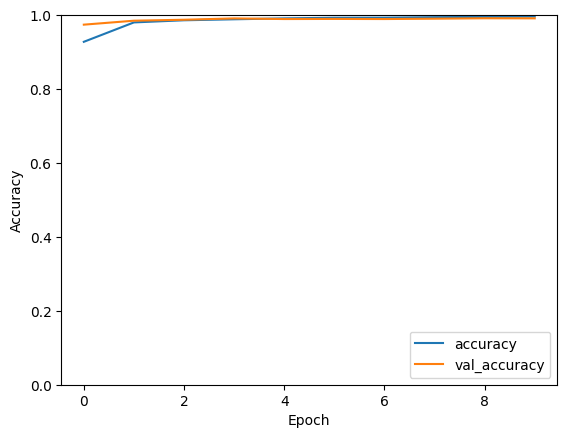

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and reshape the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)) / 255.0

# Build a CNN model using Keras
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_accuracy}")

# Plot the training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
